In [80]:
pip install numpy pandas matplotlib scikit-learn tensorflow


Note: you may need to restart the kernel to use updated packages.


In [81]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score


In [82]:
df = pd.read_csv(r'C:\Users\vinso\Downloads\hdfc data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


C:\Users\vinso\AppData\Local\Temp\ipykernel_2884\626506995.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [83]:
# Define features and target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Price']

In [84]:
# Create a MinMaxScaler for each feature
scalers = {}
for feature in X.columns:
    scalers[feature] = MinMaxScaler()
    X[feature] = scalers[feature].fit_transform(X[feature].values.reshape(-1, 1))

y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(np.array(y).reshape(-1, 1))

C:\Users\vinso\AppData\Local\Temp\ipykernel_2884\4116675717.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = scalers[feature].fit_transform(X[feature].values.reshape(-1, 1))
C:\Users\vinso\AppData\Local\Temp\ipykernel_2884\4116675717.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = scalers[feature].fit_transform(X[feature].values.reshape(-1, 1))
C:\Users\vinso\AppData\Local\Temp\ipykernel_2884\4116675717.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [85]:
# Define the prediction date range
start_date = pd.to_datetime('2023-11-02')
end_date = pd.to_datetime('2023-12-02')
date_range = pd.date_range(start=start_date, end=end_date)

In [86]:
# Create a DataFrame with the extended date range
future_data = pd.DataFrame(index=date_range, columns=X.columns)
future_data['Volume'] = 0  # You can set volume data as needed


In [87]:
# Normalize the future data using the corresponding scalers
for feature in X.columns:
    future_data[feature] = scalers[feature].transform(future_data[feature].values.reshape(-1, 1))



In [88]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X.shape[1])))  # Change input shape here
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')



In [89]:
# Train the model on the entire historical dataset
model.fit(X.values.reshape(X.values.shape[0], 1, X.values.shape[1]), y, epochs=100, batch_size=32)  # Reshape X here

Epoch 1/100
16/16 [==============================] - 3s 4ms/step - loss: 0.2749
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1943
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1156
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0527
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0160
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 11/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 12/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 13/100
16/16 [=================

In [90]:
# Make predictions for the future date range
predicted_prices = []



In [91]:
# Use a sliding window to make predictions for each day
for i in range(len(date_range)):
    if i >= len(X):
        input_data = np.array(future_data.values[i - len(X):i]).reshape(1, 1, X.shape[1])  # Reshape input data
    else:
        input_data = np.array(X.values[i]).reshape(1, 1, X.shape[1])  # Reshape input data

    predicted_price_scaled = model.predict(input_data)
    predicted_prices.append(predicted_price_scaled[0, 0])


1/1 [==============================] - 0s 49ms/step


In [92]:
# Inverse transform to get the actual prices
predicted_prices = y_scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))


In [93]:
predicted_prices

array([[1471.5564],
       [1504.4835],
       [1510.8873],
       [1506.5635],
       [1504.8345],
       [1525.8475],
       [1541.3077],
       [1522.6116],
       [1531.4686],
       [1533.9075],
       [1526.3752],
       [1513.9475],
       [1517.2268],
       [1533.4655],
       [1530.9862],
       [1497.7653],
       [1511.4438],
       [1519.7896],
       [1519.8231],
       [1515.2618],
       [1523.2614],
       [1522.1853],
       [1538.7135],
       [1541.9906],
       [1571.5891],
       [1644.455 ],
       [1644.6656],
       [1643.863 ],
       [1635.7692],
       [1634.3568],
       [1628.3765]], dtype=float32)

In [94]:
import pandas as pd

# Assuming you have 'predicted_prices' and 'date_range' like this:
predicted_prices = np.array(predicted_prices).reshape(-1, 1)
date_range = date_range.to_numpy().reshape(-1, 1)

# Create a DataFrame
data = {'Date': date_range.flatten(), 'Predicted_Price': predicted_prices.flatten()}
df = pd.DataFrame(data)

# Display the DataFrame
df

,Date,Predicted_Price
0,2023-11-02,1471.556396
1,2023-11-03,1504.483521
2,2023-11-04,1510.887329
3,2023-11-05,1506.563477
4,2023-11-06,1504.834473
5,2023-11-07,1525.847534
6,2023-11-08,1541.307739
7,2023-11-09,1522.611572
8,2023-11-10,1531.468628
9,2023-11-11,1533.907471


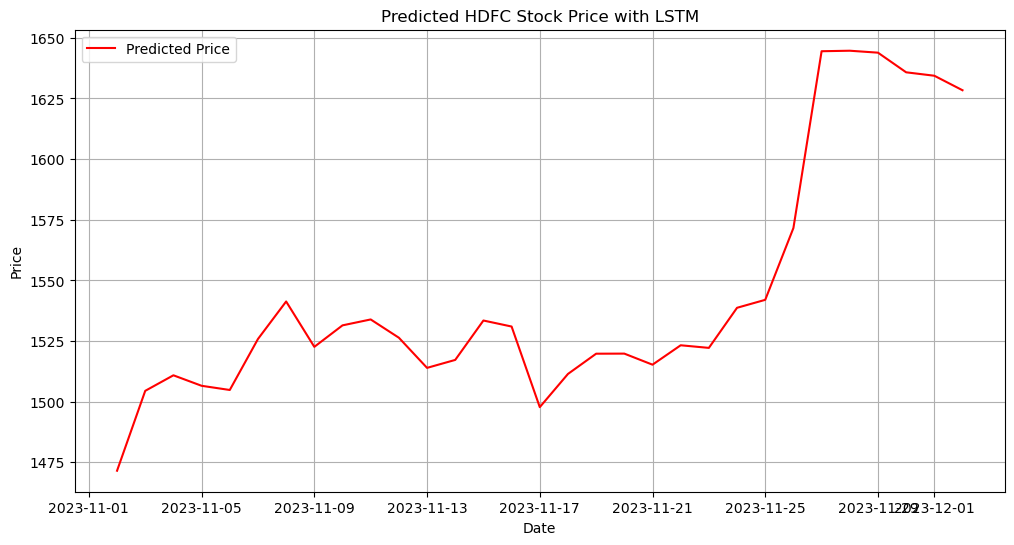

In [95]:
import matplotlib.pyplot as plt

# Assuming you have already created the 'df' DataFrame with 'Date' and 'Predicted_Price' columns

# Set the 'Date' column as the index (if not already set)
df.set_index('Date', inplace=True)

# Plot the predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Predicted_Price'], label='Predicted Price', color='red')
plt.title('Predicted HDFC Stock Price with LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
sequence_length = 10


In [97]:
X_data, y_data = [], []
for i in range(len(X) - sequence_length):
    X_data.append(X[i:i+sequence_length])
    y_data.append(y[i+sequence_length])

X_data, y_data = np.array(X_data), np.array(y_data)


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


In [99]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [100]:
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
13/13 [==============================] - 3s 10ms/step - loss: 0.3436
Epoch 2/50
13/13 [==============================] - 0s 11ms/step - loss: 0.1072
Epoch 3/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0136
Epoch 4/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0072
Epoch 5/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0058
Epoch 6/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0052
Epoch 7/50
13/13 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 8/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0043
Epoch 9/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0042
Epoch 10/50
13/13 [==============================] - 0s 10ms/step - loss: 0.0041
Epoch 11/50
13/13 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 12/50
13/13 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 13/50
13/13 [==================

In [101]:
y_pred = model.predict(X_test)


4/4 [==============================] - 1s 7ms/step


In [102]:
# Calculate MSE and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test Mean Squared Error: {mse}')
print(f'Test R^2 Score: {r2}')


Test Mean Squared Error: 0.0015026039250385574
Test R^2 Score: 0.970663244384864


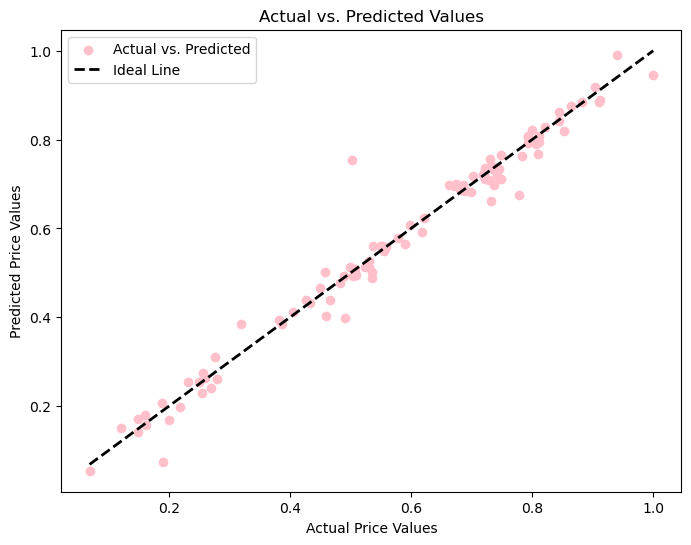

In [103]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='pink', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal Line')
plt.xlabel('Actual Price Values')
plt.ylabel('Predicted Price Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


In [104]:
accuracy = r2
print(f'Test Accuracy (R^2 Score): {accuracy * 100:.2f}%')

Test Accuracy (R^2 Score): 97.07%


In [108]:
future_data['Predicted_Price'] = predicted_prices

In [110]:
future_data.to_excel('autolstm.xlsx', index=False)

In [111]:
df = pd.read_excel('autolstm.xlsx')

In [115]:
import pandas as pd

# Assuming you already have a DataFrame named 'df'
# Example: df = pd.DataFrame({'Column1': [1, 2, 3], 'Column2': ['A', 'B', 'C']})

# Specify the file path where you want to save the Excel file
file_path = r'C:\Users\vinso\Downloads\autolstm.xlsx'

# Use the to_excel method to save the DataFrame to an Excel file
df.to_excel(file_path, index=False)  # Set index=False if you don't want to save the index column
